In [1]:
import tensorflow as tf
from tensorflow import keras



import numpy as np
import matplotlib.pyplot as plt



In [2]:
print(tf.__version__)

1.10.1


# get data 

In [66]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('./data')
#(train_image, train_lables)=data.train.next_batch(64)
train_image  = data.train.images
train_labels = data.train.labels
test_image   = data.test.images
test_labels  = data.test.labels

train_images_2D = train_image.reshape(55000,28,28)
test_images_2D = test_image.reshape(10000,28,28)
train_images_2D.shape

Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz


(55000, 28, 28)

In [67]:
train_images_2D.shape

(55000, 28, 28)

# data preprocess

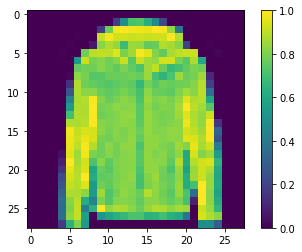

In [68]:

plt.figure()
plt.imshow(train_images_2D[0])
plt.colorbar()
plt.grid(False)



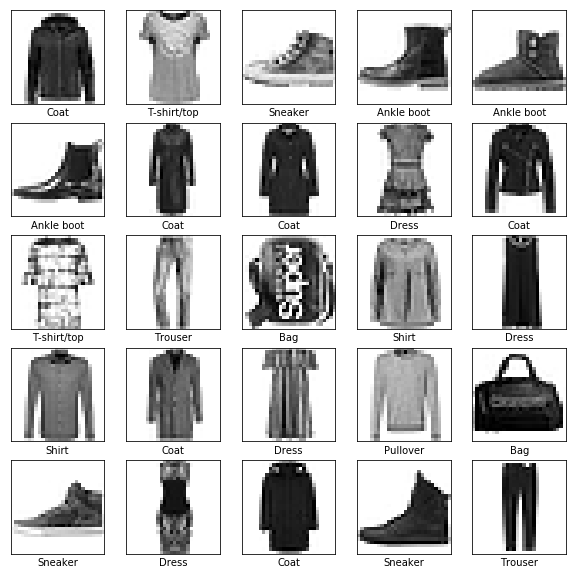

In [69]:
#归一化
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']




train_images_2D.shape
train_images_2D = train_images_2D/255.0
test_images_2D = test_images_2D/255.0




#plt.figure(figsize=(10,10))
# for i in range(25):
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(train_images[i], cmap=plt.cm.binary)
#     plt.xlabel(class_names[train_labels[i]])



#显示图画
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images_2D[i],cmap=plt.cm.binary)
    plt.xlabel (class_names[train_lables[i]]) 
    



# Build the model
## setup the layers

In [70]:
model = keras.Sequential([
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])

# compile the model

In [71]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

train the model

In [72]:
model.fit(train_image,train_lables,epochs=5)

Epoch 1/5
55000/55000 [==============================] - 5s 92us/step - loss: 0.5085 - acc: 0.8221
Epoch 2/5
55000/55000 [==============================] - 5s 83us/step - loss: 0.3816 - acc: 0.8635
Epoch 3/5
55000/55000 [==============================] - 4s 76us/step - loss: 0.3459 - acc: 0.8745
Epoch 4/5
55000/55000 [==============================] - 4s 77us/step - loss: 0.3197 - acc: 0.8828:
Epoch 5/5
55000/55000 [==============================] - 4s 76us/step - loss: 0.3019 - acc: 0.8899


Evaluate the accuracy

In [73]:
test_loss, test_acc = model.evaluate(test_image,test_lables)
print('the accuracy :',test_acc)

10000/10000 [==============================] - 0s 35us/step
the accuracy : 0.8608


make predictions

In [100]:
print(test_image[0])
predictions = model.predict(test_image)
predictions

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

array([[2.69579209e-06, 2.17617178e-08, 1.24281328e-07, ...,
        3.30461599e-02, 1.33545536e-05, 9.47905481e-01],
       [5.63263166e-05, 1.55623098e-10, 9.99126613e-01, ...,
        1.77326487e-11, 1.39054364e-07, 8.12579442e-14],
       [1.00319234e-07, 9.99999762e-01, 3.80654832e-08, ...,
        4.33757287e-16, 1.43108737e-11, 5.47071747e-14],
       ...,
       [1.03569473e-03, 4.18543245e-09, 8.70522035e-06, ...,
        1.72370903e-07, 9.98841703e-01, 1.94168556e-10],
       [4.60905966e-07, 9.99970317e-01, 4.23687453e-07, ...,
        7.16528074e-14, 8.71765327e-09, 7.09614978e-10],
       [5.18294692e-05, 2.99848557e-06, 2.32147049e-05, ...,
        2.57745683e-02, 2.07948079e-03, 1.05409134e-04]], dtype=float32)

In [75]:
predictions[0]

array([2.6957921e-06, 2.1761718e-08, 1.2428133e-07, 2.6814485e-08,
       2.6163158e-07, 1.9031323e-02, 5.7510744e-07, 3.3046160e-02,
       1.3354554e-05, 9.4790548e-01], dtype=float32)

In [76]:
np.argmax(predictions[0])

9

In [77]:
test_lables[0]

9

In [78]:
class_names[9]

'Ankle boot'

# 图形化表示

In [83]:
def plot_image(i,predictions_array,true_label,img):
    
    predictions_array, true_label, img = predictions_array[i], true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img,cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)#求最大值 的 index
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i,predictions_array,true_label):
    predictions_array, true_label = predictions_array[i],true_label[i]
    
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10),predictions_array,color = "#777777")
    plt.ylim([0,1])
    
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

    
    
    

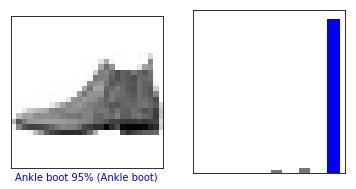

In [84]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)

array([1.9328556e-06, 7.7131915e-07, 1.3004626e-06, 7.0773939e-07,
       6.3052880e-06, 7.8696734e-01, 1.3799947e-06, 1.2872030e-01,
       8.4274933e-02, 2.5172132e-05], dtype=float32)

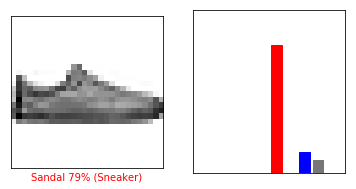

In [86]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
predictions[12]

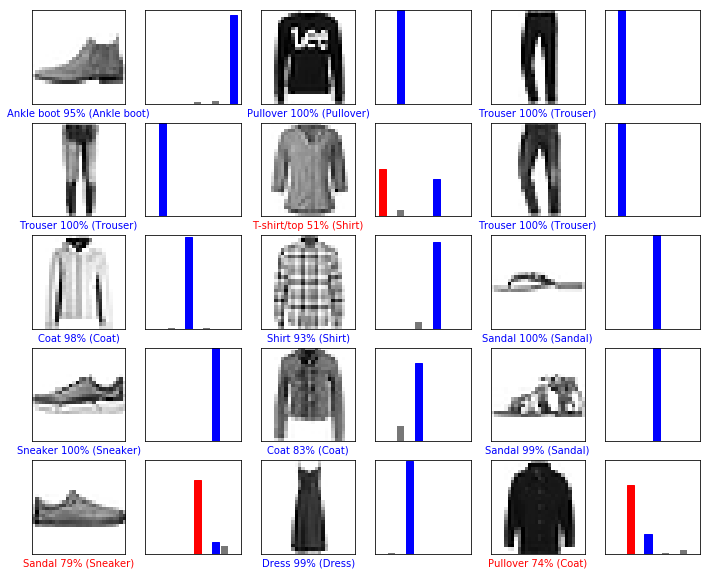

In [93]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


In [94]:
img = test_images_2D[0]
print(img.shape)

(28, 28)


In [97]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [103]:
prediction = model.predict(test_images_2D[0])
print(prediction)

ValueError: Error when checking input: expected sequential_1_input to have shape (784,) but got array with shape (28,)